<a href="https://colab.research.google.com/github/Engyogesh/miniproject/blob/main/miniproject_3_powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import traceback
from requests import get
import requests
import os


from google.colab import drive
drive.mount('/content/gdrive/')




Mounted at /content/gdrive/
Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
Data = pd.read_excel(r'/content/gdrive/My Drive/mini project/powerlifting.xlsx')


In [ ]:
display(pd.DataFrame(Data))
df = pd.DataFrame(Data)

,Age,Sex,State,Year
0,24.0,F,CT,2021
1,34.0,F,MO,2020
2,42.0,M,AR,2021
3,52.0,F,FL,2021
4,33.0,M,TX,2021
...,...,...,...,...
545,NaN,F,CA,2021
546,NaN,F,NC,2020
547,NaN,F,GA,2020
548,NaN,F,CA,2021


In [ ]:
1." Top 10 states for Men."
2." Top 10 states for Women."


# Statistics on missing Age values
rows_nan_age = df['Age'].isna().sum()  # Rows with NaN Age
indiv_nan_age = df[df['Age'].isna()].drop_duplicates(subset=['Sex', 'State']).shape[0]  # Unique individuals
indiv_nan_age_m = df[(df['Age'].isna()) & (df['Sex'] == 'M')].shape[0]  # Males with NaN Age
indiv_nan_age_f = df[(df['Age'].isna()) & (df['Sex'] == 'F')].shape[0]  # Females with NaN Age
mean_age_m = df[df['Sex'] == 'M']['Age'].mean()  # Mean age for males
mean_age_f = df[df['Sex'] == 'F']['Age'].mean()  # Mean age for females

print(f"# Rows with Age NaN: {rows_nan_age}")
print(f"# Individuals with Age NaN: {indiv_nan_age}")
print(f"# Males with Age NaN: {indiv_nan_age_m}")
print(f"# Females with Age NaN: {indiv_nan_age_f}")
print(f"Mean Age for Males: {mean_age_m}")
print(f"Mean Age for Females: {mean_age_f}")

# Top 10 States for Men
top_10_men = df[df['Sex'] == 'M'].groupby('State').size().sort_values(ascending=False).head(10)

# Top 10 States for Women
top_10_women = df[df['Sex'] == 'F'].groupby('State').size().sort_values(ascending=False).head(10)

print("\nTop 10 States for Men:\n", top_10_men)
print("\nTop 10 States for Women:\n", top_10_women)

# For more than 21-30 states, we need to select indices from 21 to 30 in the sorted list
top_states_men = df[df['Sex'] == 'M']['State'].value_counts().iloc[20:30]
top_states_women = df[df['Sex'] == 'F']['State'].value_counts().iloc[20:30]

# Create the table with two columns: State and Count for Men
table_top_states_men = pd.DataFrame({
    'State': top_states_men.index,
    'Count': top_states_men.values
})
print("\nTable of States 21-30 for Men:\n", tabulate(table_top_states_men, headers='keys', tablefmt='grid'))

# Create the table with two columns: State and Count for Women
table_top_states_women = pd.DataFrame({
    'State': top_states_women.index,
    'Count': top_states_women.values
})
print("\nTable of States 21-30 for Women:\n", tabulate(table_top_states_women, headers='keys', tablefmt='grid'))

# Rows with Age NaN: 50
# Individuals with Age NaN: 34
# Males with Age NaN: 25
# Females with Age NaN: 25
Mean Age for Males: 38.00760456273764
Mean Age for Females: 36.91139240506329

Top 10 States for Men:
 State
CT    18
WI    14
NY    14
GA    13
IN    13
AZ    13
IL    12
KY    12
CA    11
MI    10
dtype: int64

Top 10 States for Women:
 State
KS    14
CT    12
FL    12
NJ    12
NY    12
MN    11
TN    11
CO    11
OH    10
GA    10
dtype: int64

Table of States 21-30 for Men:
 +----+---------+---------+
|    | State   |   Count |
+====+=========+=========+
|  0 | MD      |       7 |
+----+---------+---------+
|  1 | OR      |       7 |
+----+---------+---------+
|  2 | VA      |       7 |
+----+---------+---------+
|  3 | FL      |       7 |
+----+---------+---------+
|  4 | TN      |       6 |
+----+---------+---------+
|  5 | IA      |       6 |
+----+---------+---------+
|  6 | OH      |       6 |
+----+---------+---------+
|  7 | WA      |       6 |
+----+---------+---------+

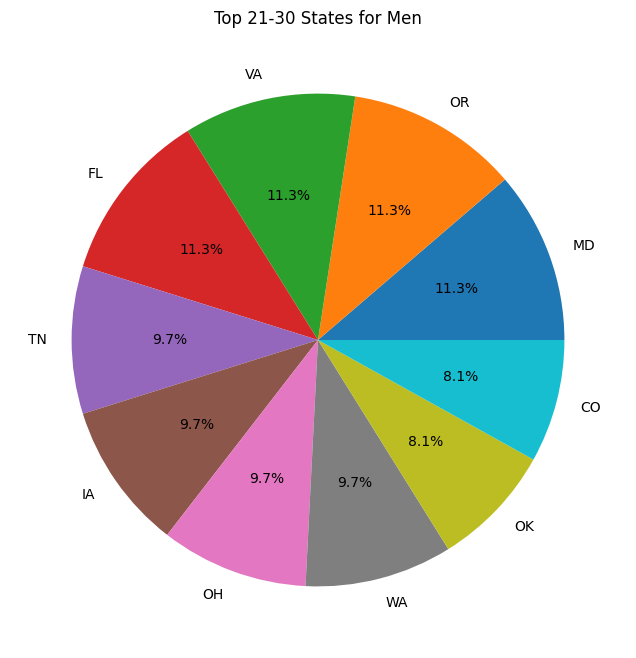

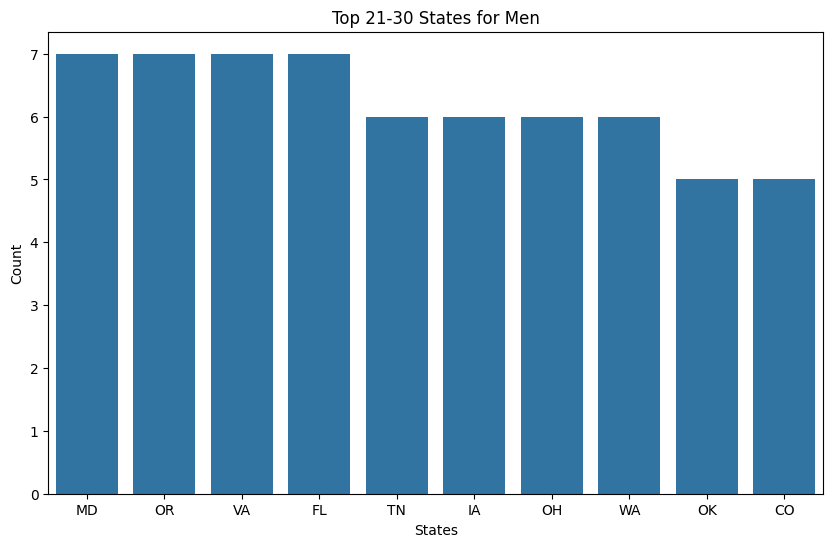

In [ ]:
3. "Plot pie chart and bar chart for Men Top 21-30 states (inclusive).
   "(Plot one with Matplotlib and one with Seaborn)"


top_states_men = df[df['Sex'] == 'M']['State'].value_counts().iloc[20:30]

# Pie Chart for Men (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(top_states_men, labels=top_states_men.index, autopct='%1.1f%%')
plt.title("Top 21-30 States for Men")
plt.show()

# Bar Chart for Men (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_men.index, y=top_states_men.values)
plt.title("Top 21-30 States for Men")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

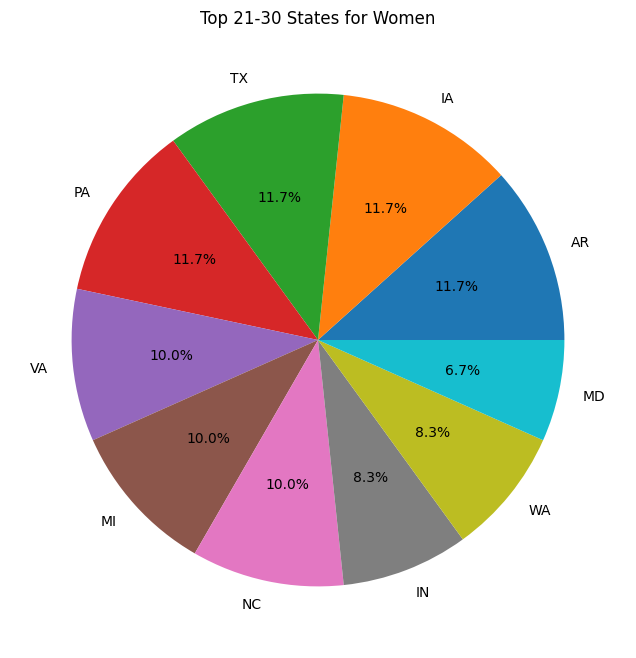

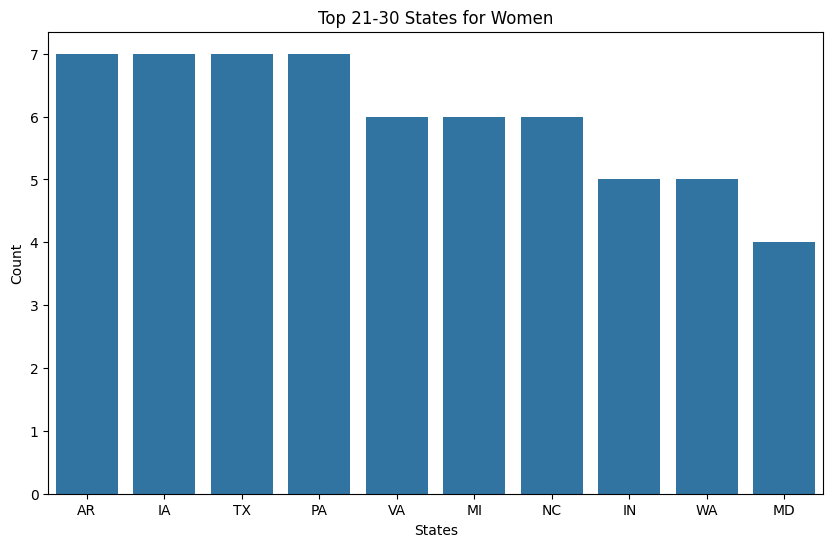

In [ ]:
4." Plot pie chart and bar chart for Women Top 21-30 states (inclusive).
   "(Plot one with Matplotlib and one with Seaborn)"


top_states_women = df[df['Sex'] == 'F']['State'].value_counts().iloc[20:30]

# Pie Chart for Women (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(top_states_women, labels=top_states_women.index, autopct='%1.1f%%')
plt.title("Top 21-30 States for Women")
plt.show()

# Bar Chart for Women (Seaborn)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_women.index, y=top_states_women.values)
plt.title("Top 21-30 States for Women")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

In [ ]:
5. "Top 10 states for Men in year 2021 "
6. "Top 10 states for women in year 2021 "


def top_states_by_year(sex, year, top_n=10):
    return df[(df['Sex'] == sex) & (df['Year'] == year)] \
            .groupby('State').size() \
            .sort_values(ascending=False).head(top_n)

# Get Top 10 States for Men and Women in 2021
top_10_states_men_2021 = top_states_by_year('M', 2021)
top_10_states_women_2021 = top_states_by_year('F', 2021)

# Function to Print Data in a Box
def print_in_box(title, data):
    border = '+' + '-' * (len(title) + 2) + '+'
    print(border)
    print(f"| {title} |")
    print(border)
    for state, count in data.items():
        print(f"| {state:<4} | {count:>5} |")
    print(border)

# Display the Results
print_in_box("Top 10 States for Men in 2021", top_10_states_men_2021)
print_in_box("Top 10 States for Women in 2021", top_10_states_women_2021)


+-------------------------------+
| Top 10 States for Men in 2021 |
+-------------------------------+
| CT   |    10 |
| GA   |    10 |
| NY   |     8 |
| NJ   |     7 |
| IN   |     7 |
| KY   |     7 |
| AR   |     6 |
| AZ   |     6 |
| CA   |     6 |
| PA   |     6 |
+-------------------------------+
+---------------------------------+
| Top 10 States for Women in 2021 |
+---------------------------------+
| OH   |     8 |
| CT   |     7 |
| FL   |     7 |
| NJ   |     7 |
| CA   |     6 |
| NY   |     6 |
| GA   |     6 |
| NV   |     6 |
| KS   |     6 |
| TN   |     6 |
+---------------------------------+


<ipython-input-20-244580f3d8ef>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)


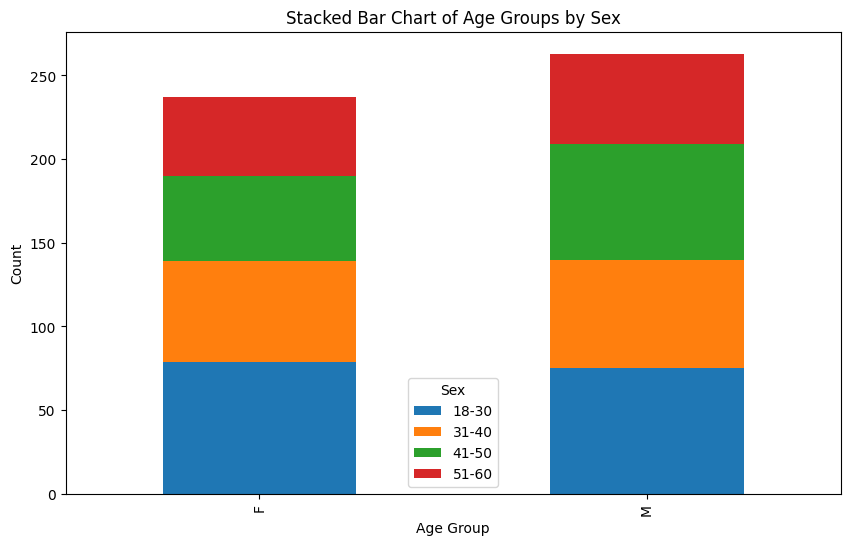

In [ ]:
7. "Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60"

# Define age bins
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']

# Add age group column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a pivot table
age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)

# Stacked Bar Chart
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Age Groups by Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


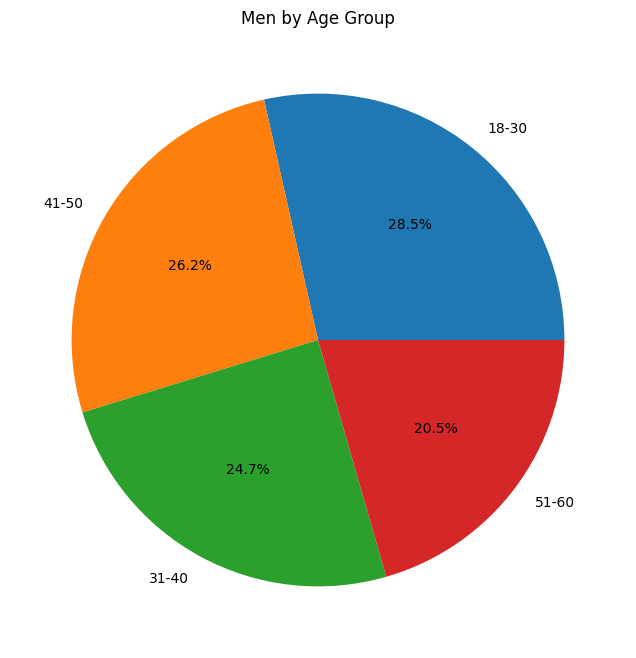

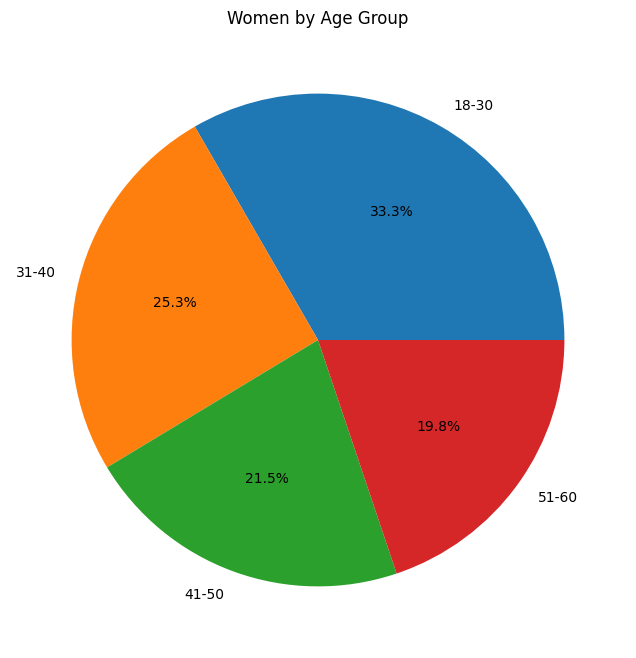

In [ ]:
8. "Pie chart for men w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)"
9. "Pie chart for women w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)"

# Age group distribution for men
age_group_dist_men = df[df['Sex'] == 'M']['Age Group'].value_counts()

# Pie Chart for Men (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_men, labels=age_group_dist_men.index, autopct='%1.1f%%')
plt.title("Men by Age Group")
plt.show()

# Age group distribution for women
age_group_dist_women = df[df['Sex'] == 'F']['Age Group'].value_counts()

# Pie Chart for Women (Matplotlib)
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_women, labels=age_group_dist_women.index, autopct='%1.1f%%')
plt.title("Women by Age Group")
plt.show()


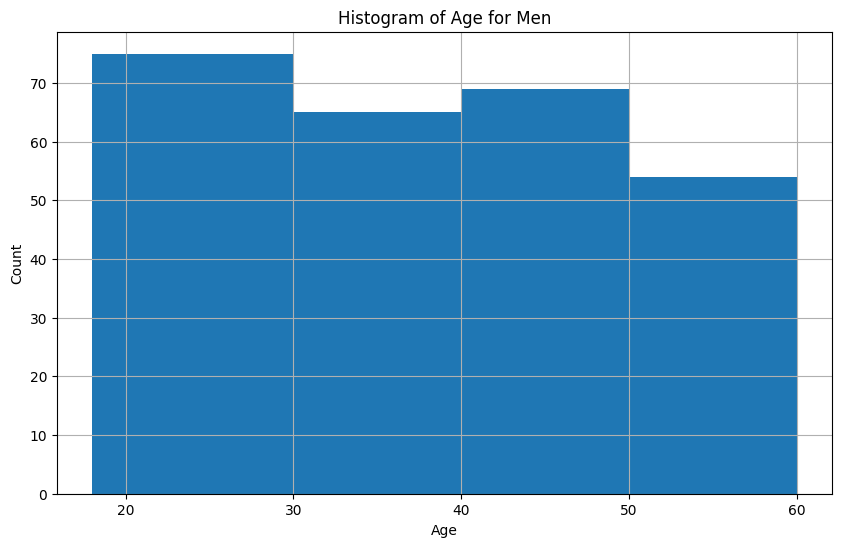

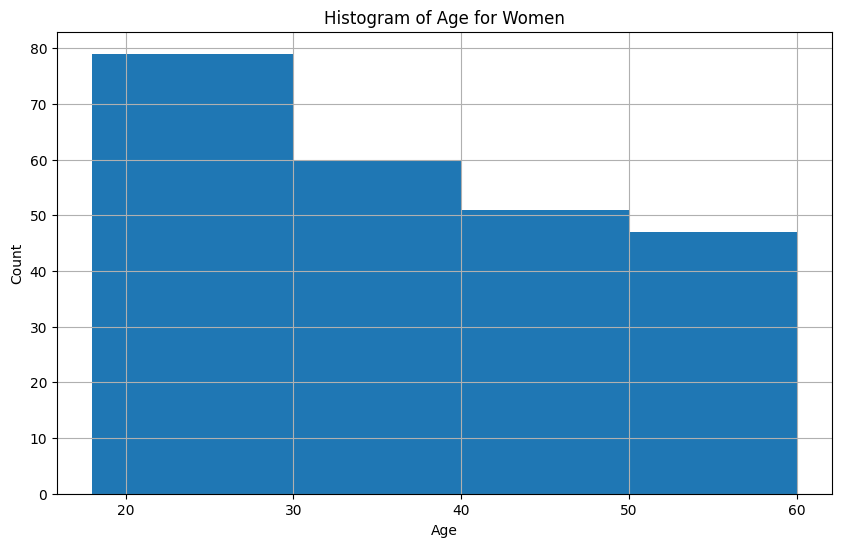

In [ ]:
10. "Histogram for men by age (use Age for binning purpose)"
11. "Histogram for women by age (use Age for binning purpose)"

# Histogram for Men by Age
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'M']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Histogram for Women by Age
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'F']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Women')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
